In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
import seis_nn
import cupy as cp
import seis_diagnostics

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
1
n_models: 1


In [2]:
data=kgs.load_all_train_data()
d = data[7011]

capturing graph


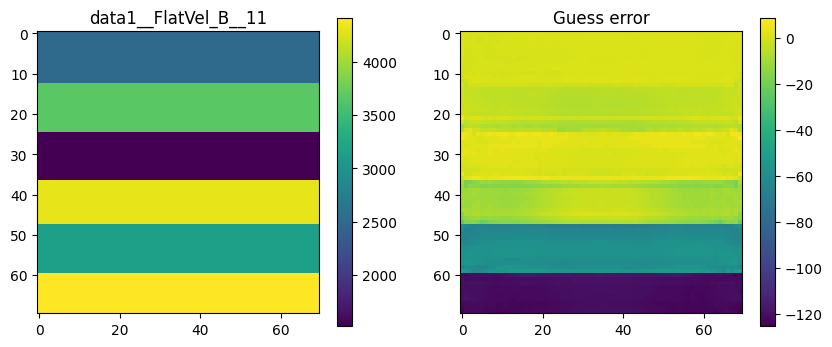

capturing graph


In [ ]:
importlib.reload(seis_diagnostics)

model = seis_invert.InversionModel()
model.state = 1
model.maxiter = 500

do_which_list = [True,True,True]

def param_func(model,value):
    model.prior.λ = 10**value
    return model
param_values = np.linspace(-11,-6,6)
param_name = "log_prior_λ"


seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name)

In [ ]:
%debug